In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno
# import geopandas as gpd
import plotly.express as px
from IPython.display import IFrame
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set(rc={'figure.figsize':(12,5)})
pd.set_option('display.max_columns', 50)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
data= pd.read_csv("cleaned_dataset_with_incomegroup.csv")

data.head

<bound method NDFrame.head of             countryname countrycode  year  elecrate_total     gdp_value  \
0                Belize         BLZ  1960           29.30  2.807189e+07   
1           Philippines         PHL  1960           16.50  6.684569e+09   
2    Dominican Republic         DOM  1960           20.00  6.723997e+08   
3                 Chile         CHL  1960           70.60  4.110000e+09   
4         Venezuela, RB         VEN  1961           58.00  9.058121e+09   
..                  ...         ...   ...             ...           ...   
941            Paraguay         PRY  2015           99.33  2.728258e+10   
942                Togo         TGO  2015           48.30  4.087628e+09   
943            Colombia         COL  2015           97.70  2.915196e+11   
944              Belize         BLZ  2015           91.80  1.742546e+09   
945                Peru         PER  2015           74.09  1.892121e+11   

     economicgap (GDP difference)                     Region  \
0    

In [6]:
data.info

<bound method DataFrame.info of             countryname countrycode  year  elecrate_total     gdp_value  \
0                Belize         BLZ  1960           29.30  2.807189e+07   
1           Philippines         PHL  1960           16.50  6.684569e+09   
2    Dominican Republic         DOM  1960           20.00  6.723997e+08   
3                 Chile         CHL  1960           70.60  4.110000e+09   
4         Venezuela, RB         VEN  1961           58.00  9.058121e+09   
..                  ...         ...   ...             ...           ...   
941            Paraguay         PRY  2015           99.33  2.728258e+10   
942                Togo         TGO  2015           48.30  4.087628e+09   
943            Colombia         COL  2015           97.70  2.915196e+11   
944              Belize         BLZ  2015           91.80  1.742546e+09   
945                Peru         PER  2015           74.09  1.892121e+11   

     economicgap (GDP difference)                     Region  \
0  

In [17]:
data.columns

Index(['countryname', 'countrycode', 'year', 'elecrate_total', 'gdp_value',
       'economicgap (GDP difference)', 'Region', 'IncomeGroup'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

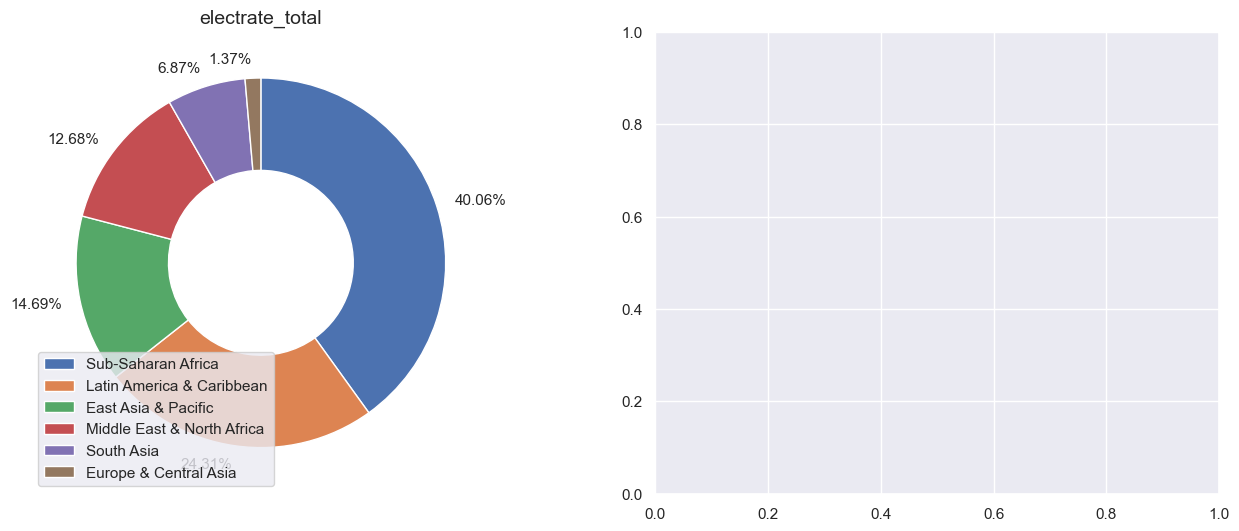

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plt.subplot(1, 2, 1)
#plot of electrate total per region
statuscount2 = round(data["Region"].value_counts(normalize=True)*100,2)
plt.pie(statuscount2, labels=[f"{str(x)}%" for x in statuscount2.values], startangle=90, counterclock = False, wedgeprops = {'width': 0.5});
plt.title('electrate_total', fontsize=14)
plt.legend(statuscount2.index);

plt.show

The Pie Chart gives us an insight into which region has the highest electricity rate. It has been uncovered that the highest total electricity rate was recorded in the Sub-Saharan Africa Region and the lowest rates was recorded in the Europe and Central asia Region.

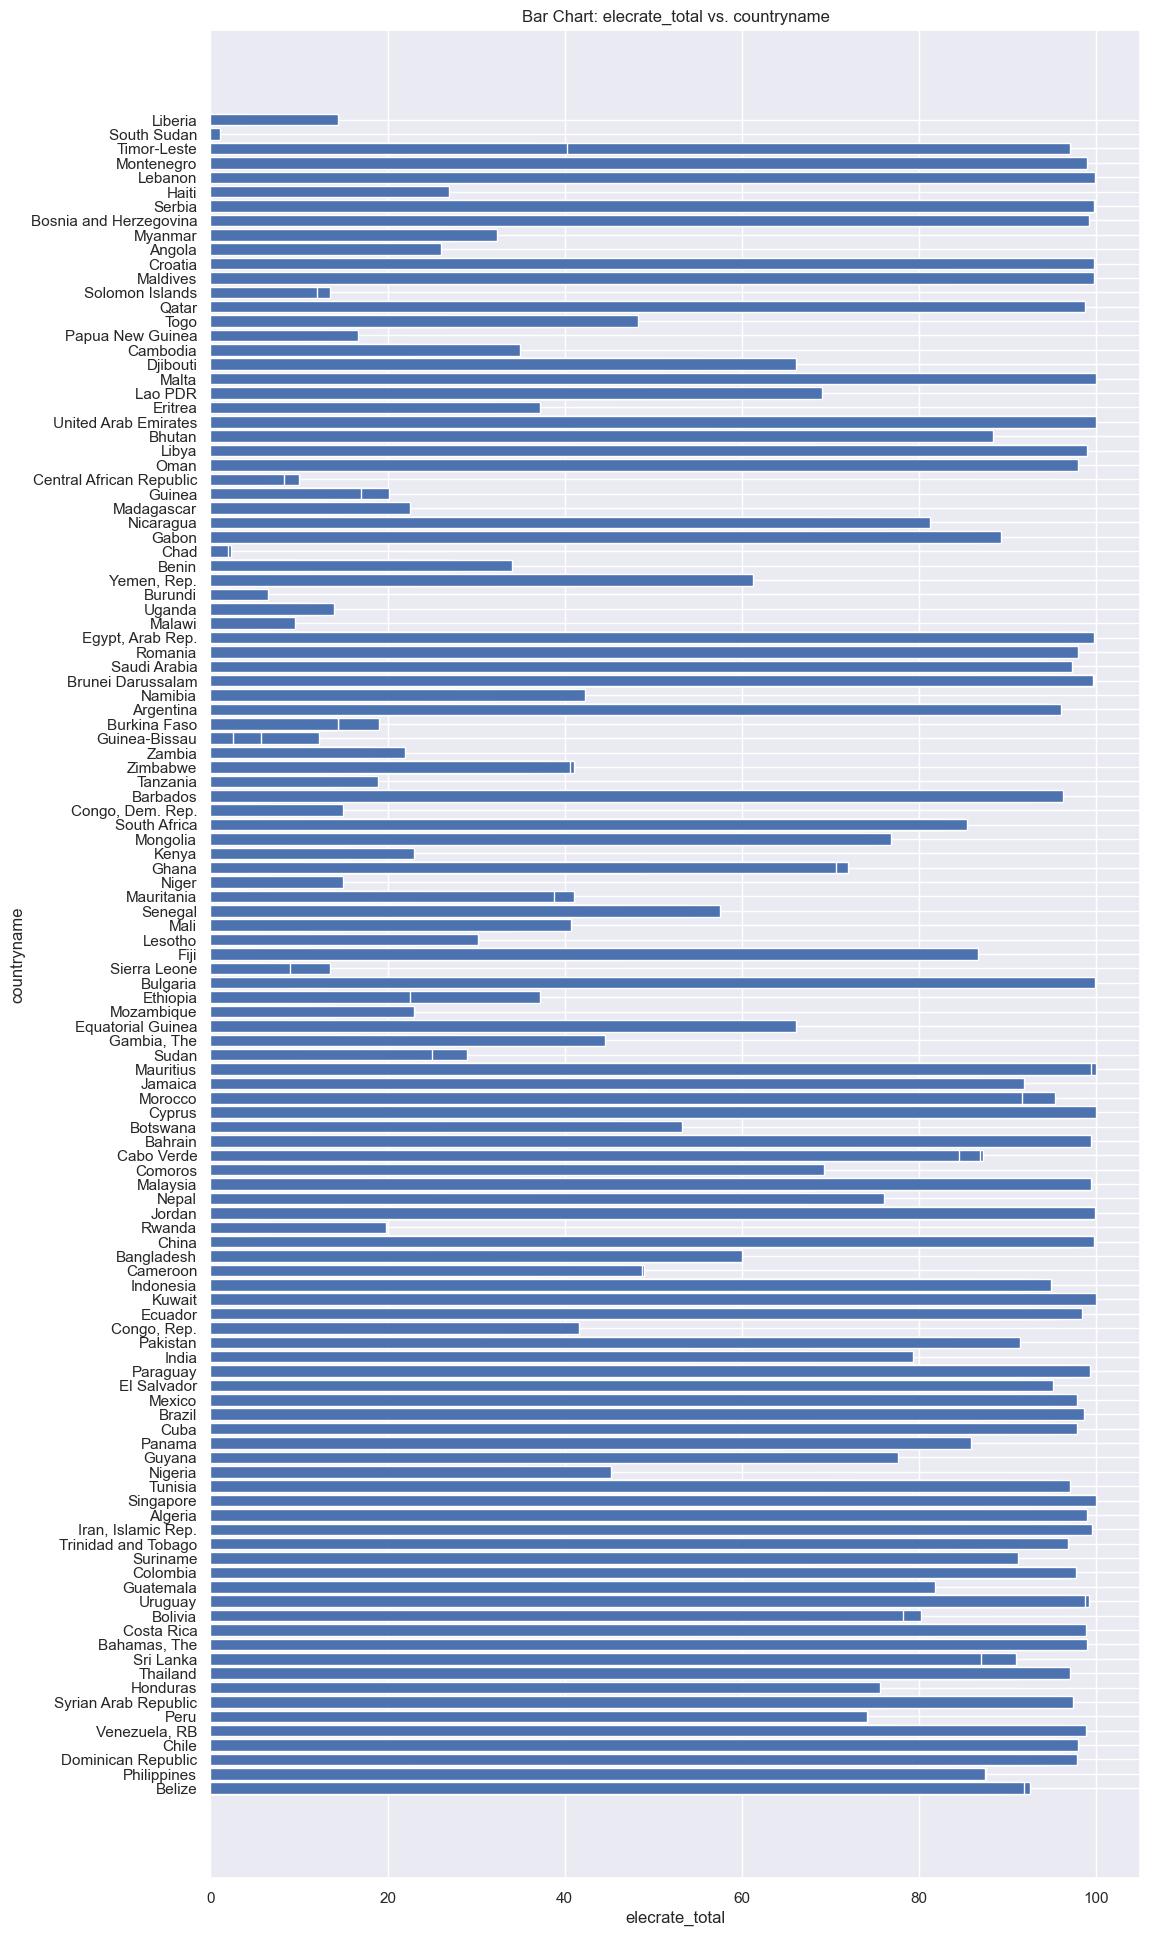

In [34]:
plt.figure(figsize=(12, 24))
plt.barh(data['countryname'], data['elecrate_total'])
plt.title('Bar Chart: elecrate_total vs. countryname')
plt.xlabel('elecrate_total')
plt.ylabel('countryname')
plt.show()

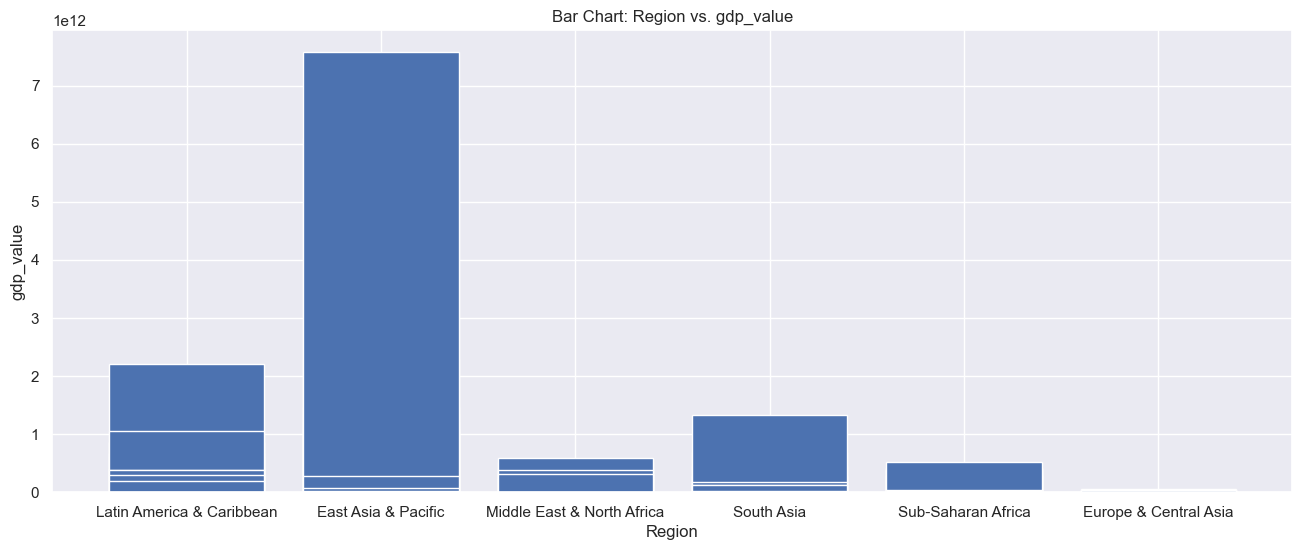

In [33]:
plt.figure(figsize=(16, 6))
plt.bar(data['Region'], data['gdp_value'])
plt.title('Bar Chart: Region vs. gdp_value')
plt.xlabel('Region')
plt.ylabel('gdp_value')
plt.show()

In [ ]:
From this Bar Chart it is evident that the Region with the highest GDP value is the East Asia & Pacific Region.
The Sub-Saharan Africa has a very low GDP rate.
Note: GDP(Gross Domestic Product) value is the standard measure of the value added or created 
through the production of goods and services in a country/region during a certain period.


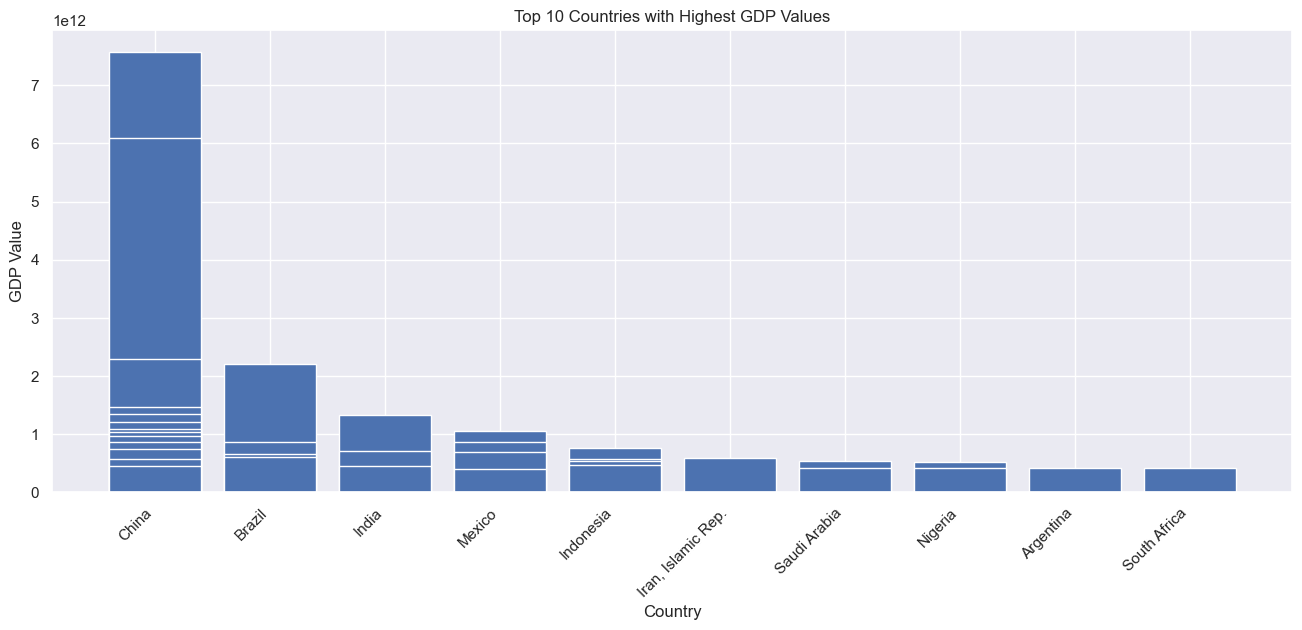

In [41]:
#plot showing the top 10 countries with the highest GDP values

data_sorted = data.sort_values(by='gdp_value', ascending=False)

# Select the top 10 countries
top_10_countries = data_sorted.head(35)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(16, 6))

# Plot the bar chart
ax.bar(top_10_countries['countryname'], top_10_countries['gdp_value'])

# Customize the chart
ax.set_xlabel('Country')
ax.set_ylabel('GDP Value')
ax.set_title('Top 10 Countries with Highest GDP Values')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

This Chart gives us the top 10 countries with the highest GDP values, Not surprising that China takes a massive lead,
follwed by Brazil. The least of this top 10 list is South Africa.

<function matplotlib.pyplot.show(close=None, block=None)>

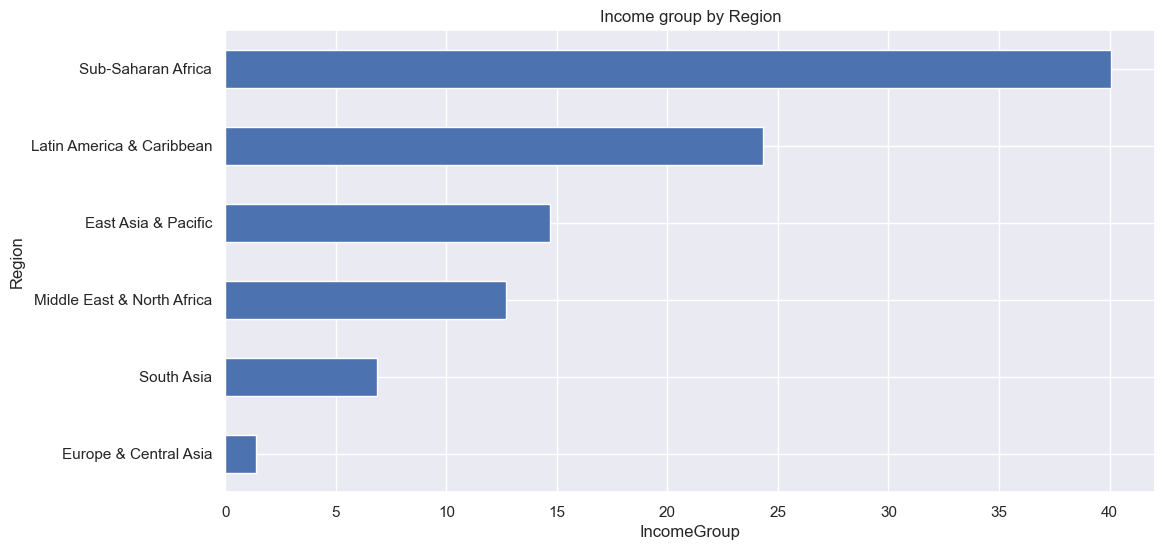

In [27]:
#plot showing the incomegroup by region
plt.figure(figsize=(12,6))
fig = (data["Region"].value_counts(normalize=True)*100).sort_values(ascending=True).plot(kind='barh',
                            title='Income group by Region',ylabel='Region', xlabel='IncomeGroup');
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

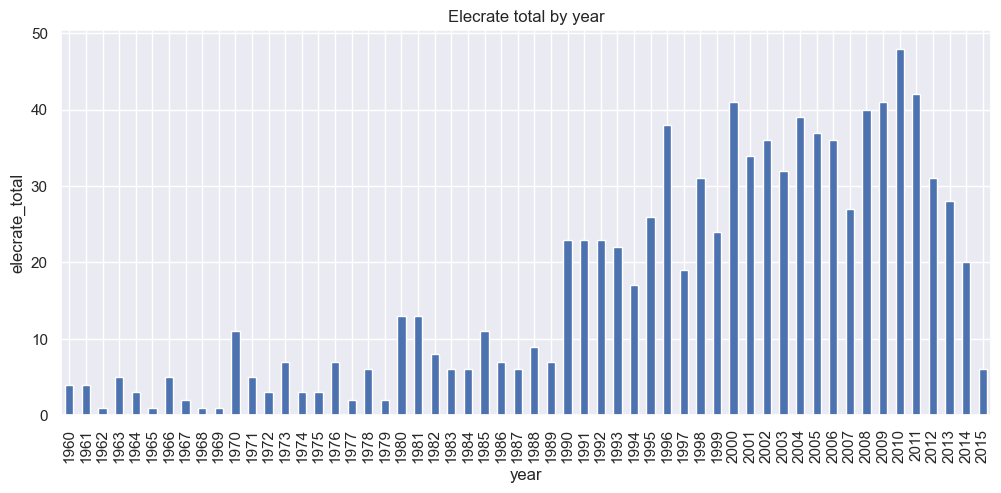

In [16]:
#plot showing elecrate total by year

electrate_total_by_year = data['year'].value_counts().sort_index()
electrate_total_by_year.plot(kind='bar')
plt.xlabel('year')
plt.ylabel('elecrate_total')
plt.title('Elecrate total by year');
plt.show

This bar chart gives us an insight as to what year has the highest recorded total electricity rate. It has therefore been discovered that the highest total electricity rate was recorded in 2010 closely followed by 2011. The least recorded rates occured in the 1960's.

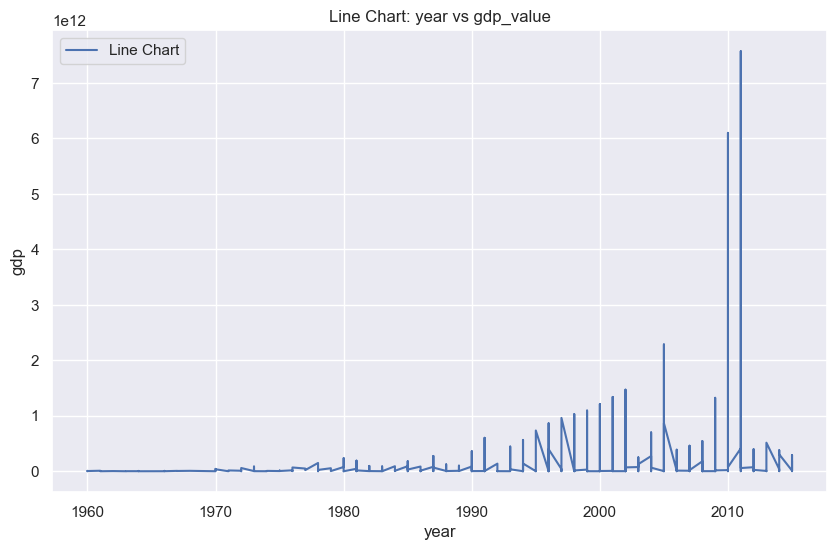

In [39]:
#plot showing year vs gdp value
plt.figure(figsize=(10, 6))

# Plotting a line chart
plt.plot(data['year'], data['gdp_value'], label='Line Chart')

# Adding labels and title
plt.xlabel('year')
plt.ylabel('gdp')
plt.title('Line Chart: year vs gdp_value')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

This line chart gives us a vivid visuals to discover what year had the highest record of GDP value across all regions, 2011 clearly takes the spotlight followed by 2010.

Text(0.5, 0, 'IncomeGroup')

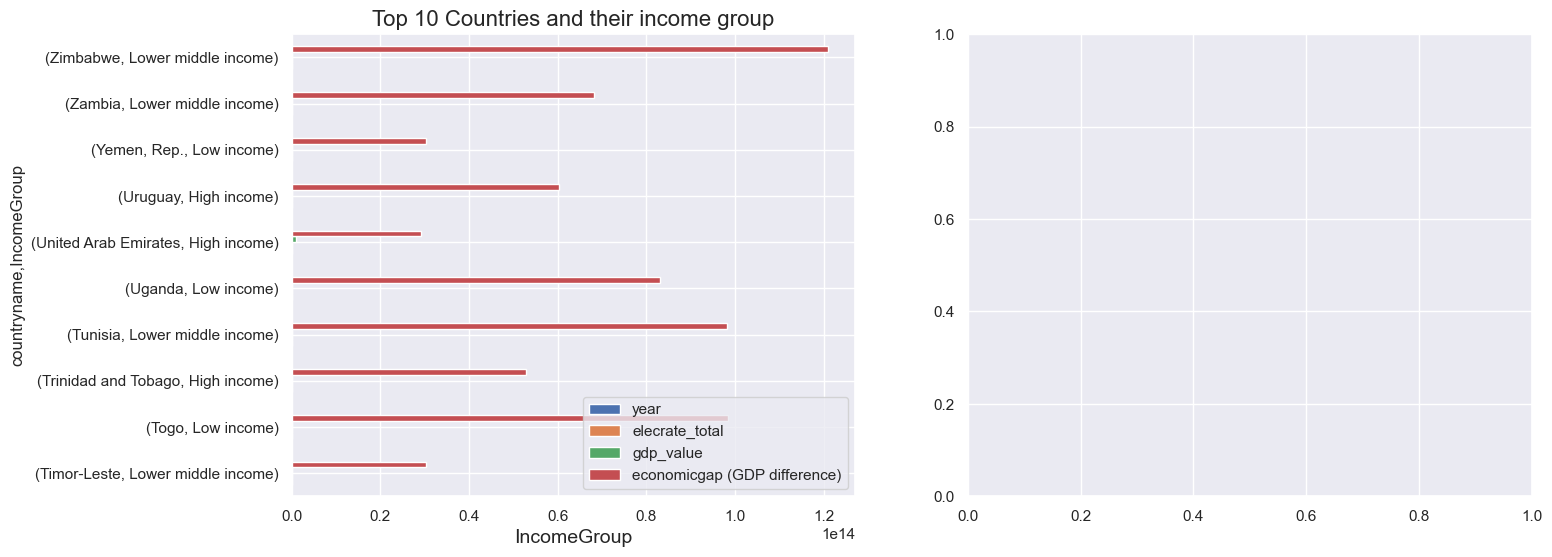

In [38]:
# Create a figure with a specific figure size
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Countries and their income group
top_10_countries = data.groupby(['countryname', 'IncomeGroup']).sum().sort_values(by='countryname', ascending=True).tail(10)

top_10_countries.plot.barh(ax=axes[0])
axes[0].set_title('Top 10 Countries and their income group', fontsize=16)
axes[0].set_xlabel('IncomeGroup', fontsize=14)




Here we can see from this chart the uncovering of the top 10 countries based on their income rate and group. Zimbabwe has the highest group of Lower middle incom earners

<function matplotlib.pyplot.show(close=None, block=None)>

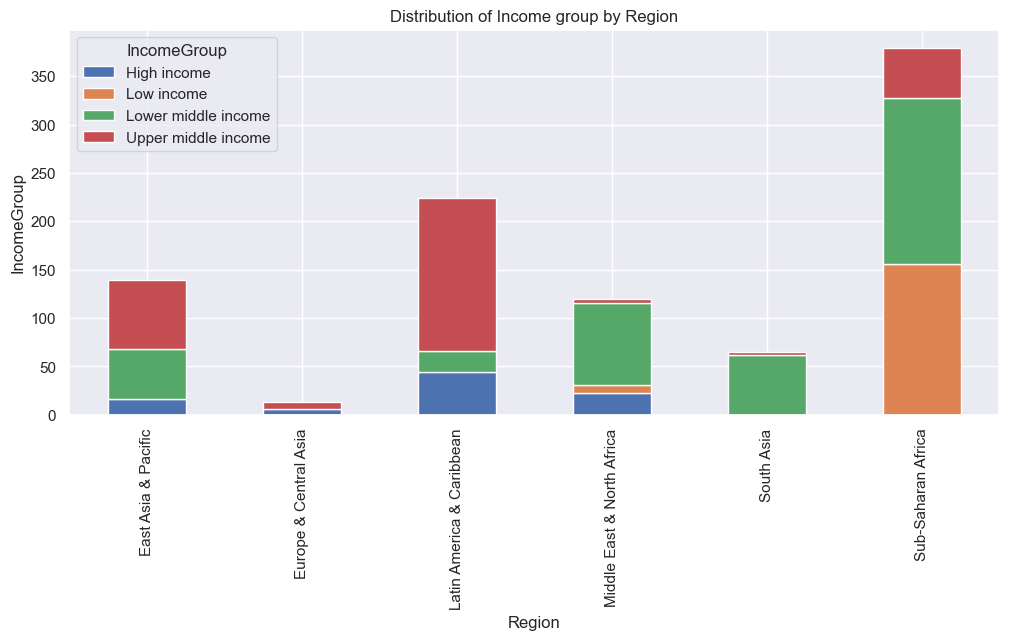

In [13]:
# Distribution of GDP by Region
gdp_by_region = data.groupby(['Region', 'IncomeGroup']).size().unstack(fill_value=0)

# Create the grouped bar chart
gdp_by_region.plot(kind='bar', stacked=True)

# Add labels and title to the plot
plt.xlabel('Region')
plt.ylabel('IncomeGroup')
           
plt.title('Distribution of Income group by Region')
plt.xticks(rotation=90);
plt.show

The aim of this stacked bar chart is to show us the income rate level of each region, the income rate has been divided into groups of High Income, Low Income, Lower middle income and Upper middle income. From the stack, it is evident that Latin America & Carribean has the largest group of High income earners and the highest group of upper middle income earners. Sub-Saharan Africa has the highest group of Low income earners and Lower income earners.  